In [72]:
import missingno as msno 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

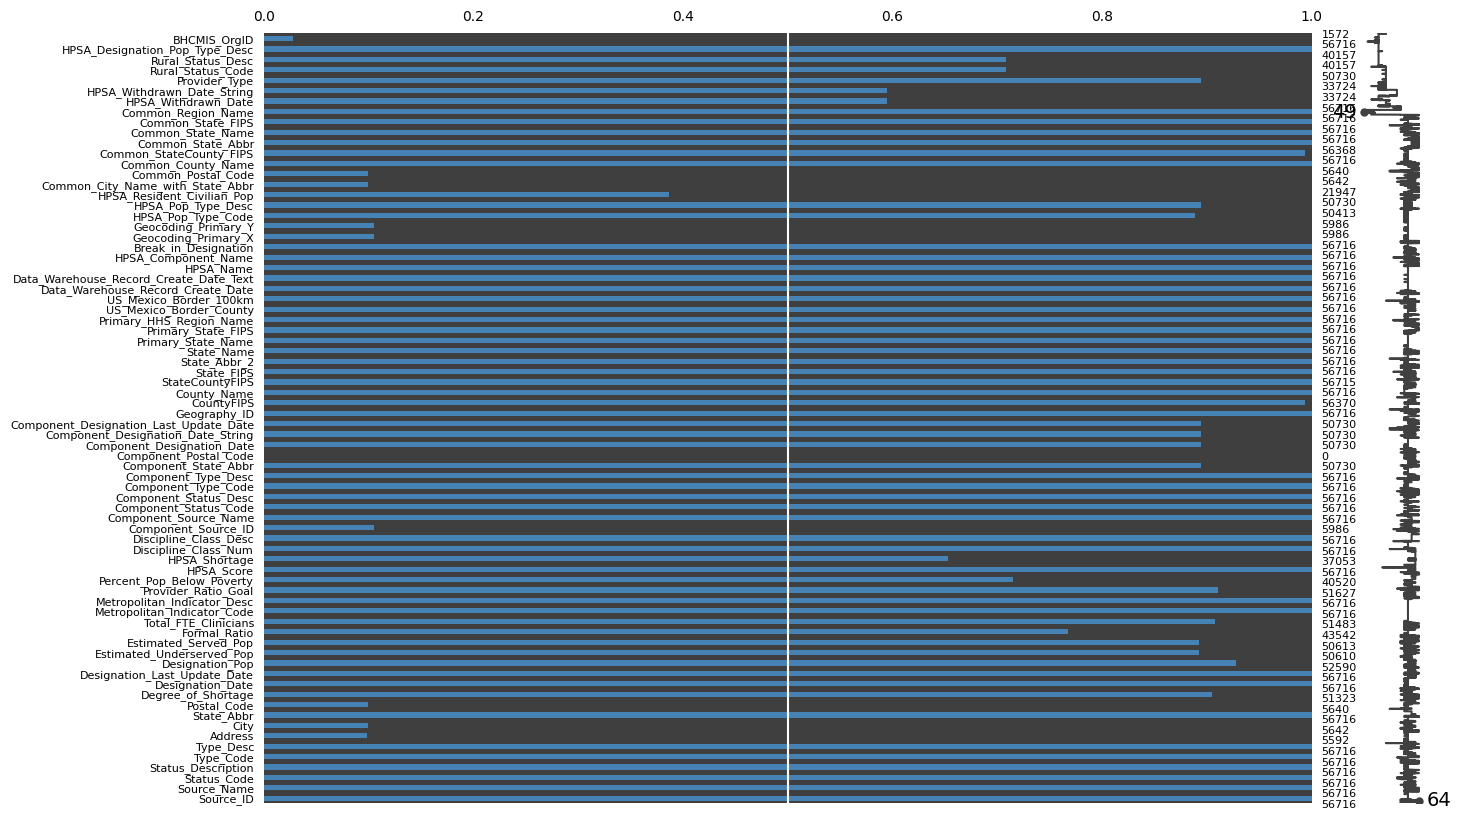

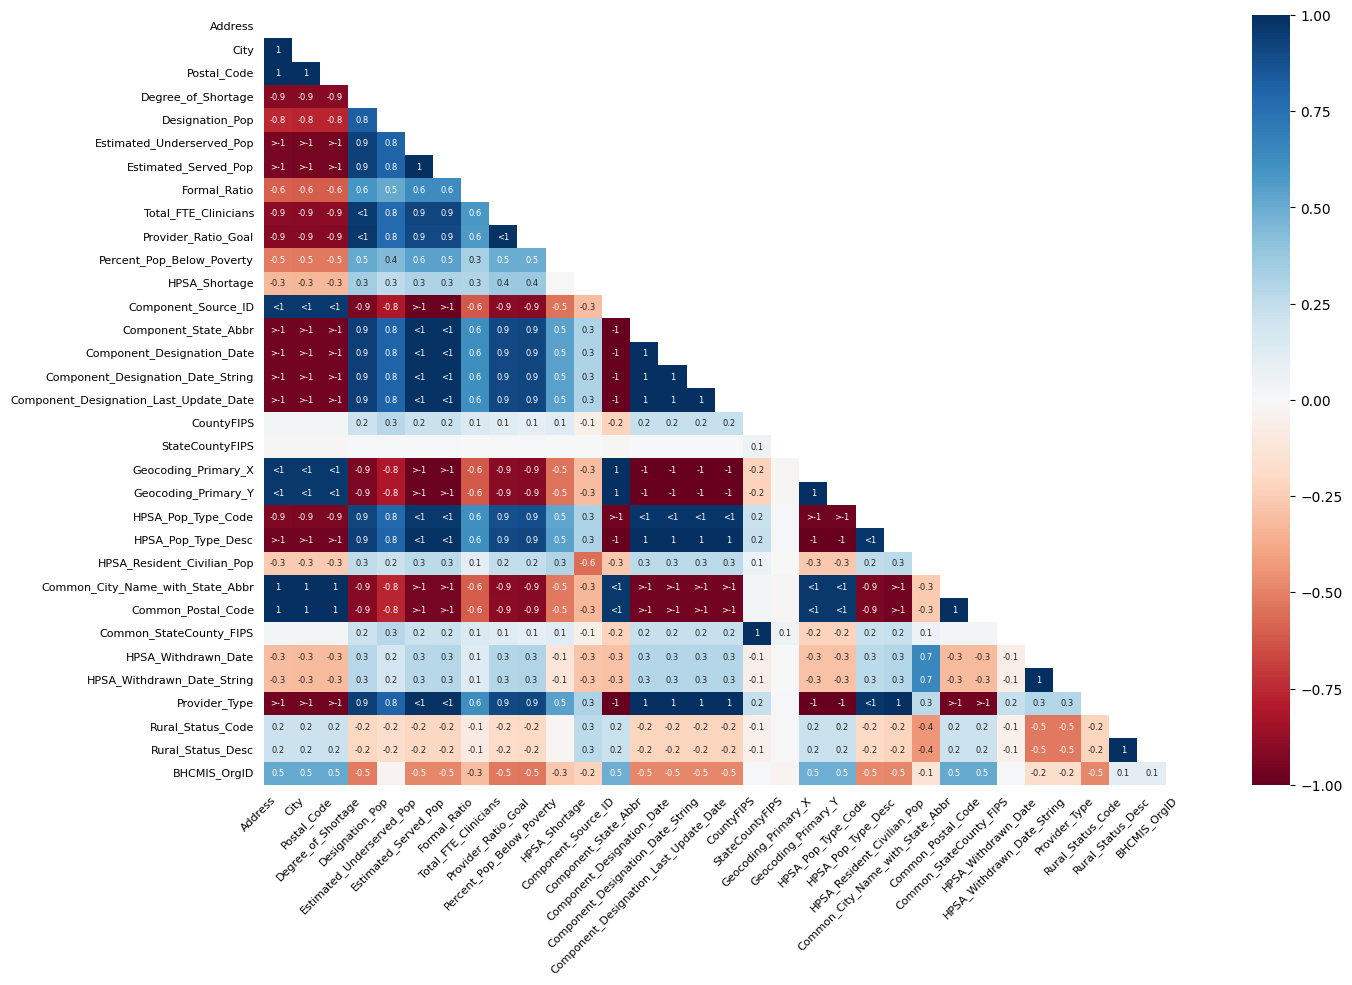

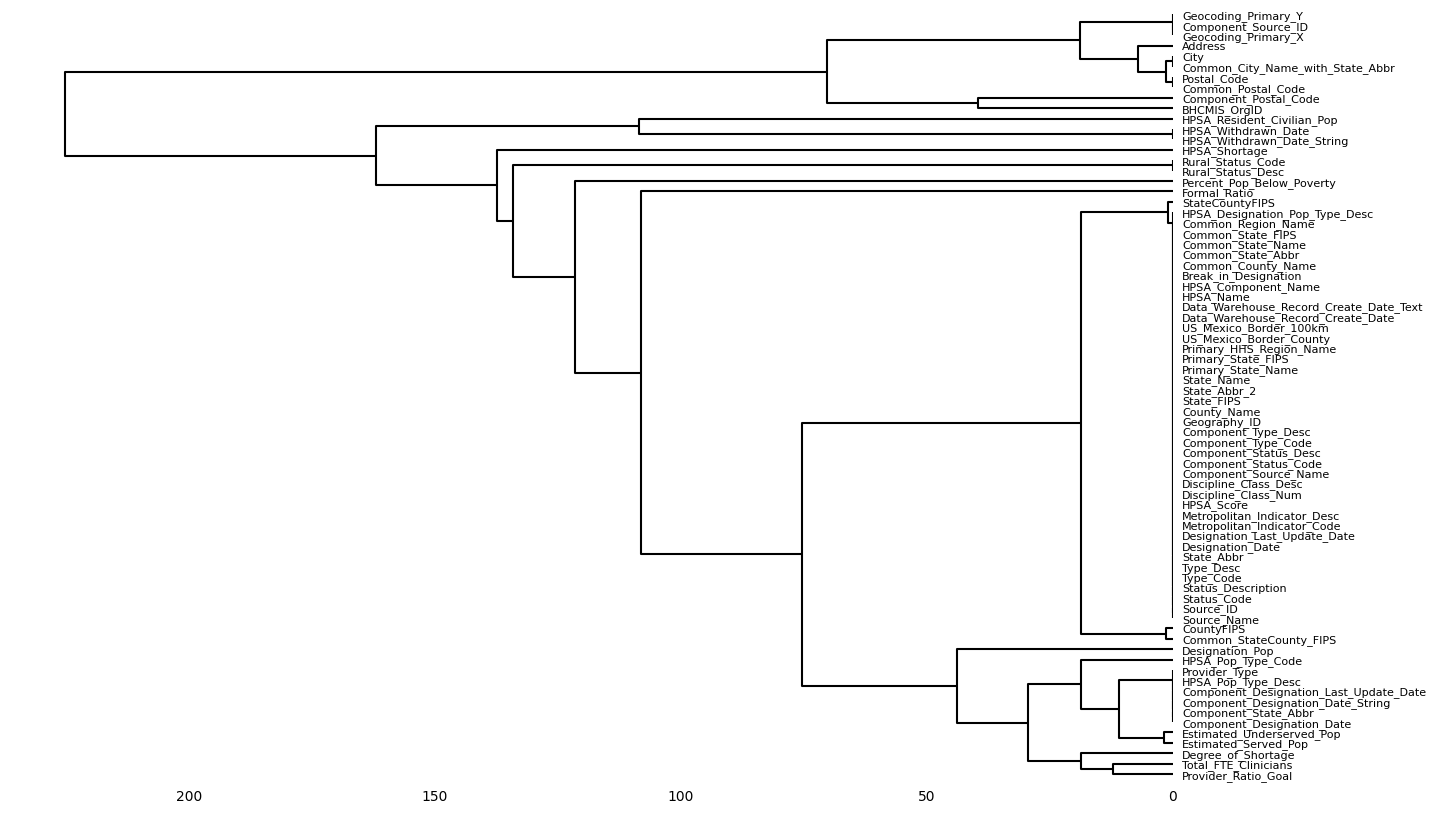

In [73]:
file_path = '/Users/raffimannarelli/Downloads/primary.csv'  # Replace with your file path
hpsa_data = pd.read_csv(file_path,low_memory=False)



msno.matrix(hpsa_data)

# Bar chart visualization
msno.bar(hpsa_data,figsize=(15,10),fontsize=8,color='steelblue')

# Heatmap of missingness correlation
msno.heatmap(hpsa_data,figsize=(15,10),fontsize=8)

# Dendrogram
msno.dendrogram(hpsa_data,figsize=(15,10),fontsize=8)

plt.show()


In [74]:
original_columns = hpsa_data.columns.tolist()

# dropping columns that are not needed, such as dates, Arbitrary ID's, Adresses etc 
hpsa_data.drop(['Source_ID','Source_Name','Designation_Date','Designation_Last_Update_Date','Estimated_Served_Pop'
                 ,'Provider_Type','Common_StateCounty_FIPS','Primary_State_FIPS','Common_State_FIPS','Discipline_Class_Desc',
                 'Provider_Ratio_Goal','County_Name','Rural_Status_Code','Geography_ID','HPSA_Designation_Pop_Type_Desc','Common_State_Abbr','Common_State_Name',
                 'Common_Region_Name','HPSA_Component_Name','HPSA_Name','BHCMIS_OrgID','CountyFIPS','State_Name','State_FIPS','StateCountyFIPS','State_Abbr_2',
                 'Primary_State_Name','Common_City_Name_with_State_Abbr','Data_Warehouse_Record_Create_Date','Data_Warehouse_Record_Create_Date_Text','Geocoding_Primary_X',
                 'Geocoding_Primary_Y','Component_Source_Name','Discipline_Class_Num','Discipline_Class_Num','Common_County_Name','Common_Postal_Code',], axis = 1, inplace = True)      

# dropping columns with more than 40% missing values   
hpsa_data.dropna(thresh=len(hpsa_data) * .6, axis=1, inplace=True)

#one hot encoding
columns_to_encode = ['Status_Code', 'Type_Desc', 'Type_Code', 'Status_Description','Metropolitan_Indicator_Desc']

for col in columns_to_encode:
    hpsa_data = pd.concat([hpsa_data, pd.get_dummies(hpsa_data[col], prefix=col)], axis=1)
    hpsa_data.drop(col, axis=1, inplace=True)

#binary encoding
#convert hpsa_data['Rural_Status_Desc'] to string
hpsa_data['Rural_Status_Desc'] = hpsa_data['Rural_Status_Desc'].fillna('NaN')

hpsa_data['Rural_Status_Endcoded'] = hpsa_data['Rural_Status_Desc'].map({'Rural': 1, 'Non-Rural': 0,'Partially Rural':2,'Unknown':3,'Not Applicable':4,'NaN':5})

hpsa_data.drop('Rural_Status_Desc', axis=1,inplace=True)

  
new_columns = hpsa_data.columns.tolist()

dropped_columns = set(original_columns) - set(new_columns)
len(dropped_columns)

50

In [75]:
hpsa_data['Designation_Pop'].fillna(hpsa_data['Designation_Pop'].mean(), inplace=True)
hpsa_data['Percent_Pop_Below_Poverty'].fillna(hpsa_data['Percent_Pop_Below_Poverty'].mean(), inplace=True)
hpsa_data['HPSA_Shortage'].fillna(hpsa_data['HPSA_Shortage'].mean(), inplace=True)
hpsa_data['Total_FTE_Clinicians'].fillna(hpsa_data['Total_FTE_Clinicians'].mean(), inplace=True)
hpsa_data['Estimated_Underserved_Pop'].fillna(hpsa_data['Estimated_Underserved_Pop'].mean(), inplace=True)

# Assuming 'hpsa_data' is your DataFrame
# Create interaction variables by multiplying the columns

# Interaction between Designation_Pop and Percent_Pop_Below_Poverty
hpsa_data['Interaction_Designation_Poverty'] = hpsa_data['Designation_Pop'] * hpsa_data['Percent_Pop_Below_Poverty']

# Interaction between Designation_Pop and HPSA_Shortage
hpsa_data['Interaction_Designation_Shortage'] = hpsa_data['Designation_Pop'] * hpsa_data['HPSA_Shortage']

# Interaction between Percent_Pop_Below_Poverty and HPSA_Shortage
hpsa_data['Interaction_Poverty_HPSA_Shortage'] = hpsa_data['Percent_Pop_Below_Poverty'] * hpsa_data['HPSA_Shortage']

# Optionally, you can create a three-way interaction between all three
hpsa_data['Interaction_All_Three'] = hpsa_data['Designation_Pop'] * hpsa_data['Percent_Pop_Below_Poverty'] * hpsa_data['HPSA_Shortage']


In [76]:
hpsa_data['HPSA_Shortage'].value_counts()
# 11.27 is the mean of the HPSA shortage column

HPSA_Shortage
 9.101765     19663
 0.000000      3817
 0.100000       359
 0.900000       321
 1.500000       308
              ...  
-1.760000         1
 9.320000         1
 5.835000         1
 0.049500         1
 11.690000        1
Name: count, Length: 1437, dtype: int64

<Axes: xlabel='Region'>

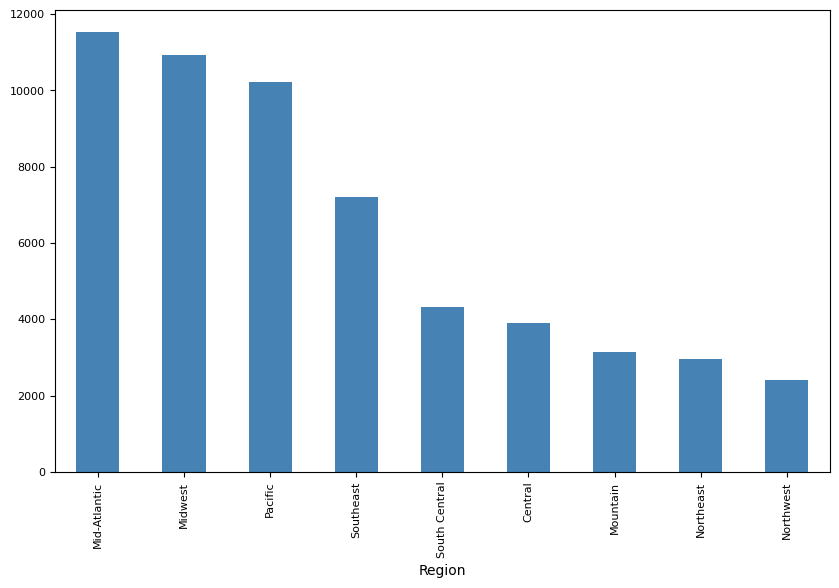

In [77]:
# to reduce dimensionality , added region feature to 
# import LabelEncoder
from sklearn.preprocessing import LabelEncoder
region_mapping = {
    # Region 1 - Boston (Northeast)
    'CT': 'Northeast', 'ME': 'Northeast', 'MA': 'Northeast', 
    'NH': 'Northeast', 'RI': 'Northeast', 'VT': 'Northeast',
    
    # Region 2 - New York (Mid-Atlantic)
    'NJ': 'Mid-Atlantic', 'NY': 'Mid-Atlantic', 'PR': 'Mid-Atlantic', 
    'VI': 'Mid-Atlantic',
    
    # Region 3 - Philadelphia (Mid-Atlantic)
    'DE': 'Mid-Atlantic', 'DC': 'Mid-Atlantic', 'MD': 'Mid-Atlantic', 
    'PA': 'Mid-Atlantic', 'VA': 'Mid-Atlantic', 'WV': 'Mid-Atlantic',
    
    # Region 4 - Atlanta (Southeast)
    'AL': 'Southeast', 'FL': 'Southeast', 'GA': 'Southeast', 'KY': 'Southeast', 
    'MS': 'Southeast', 'NC': 'Southeast', 'SC': 'Southeast', 'TN': 'Southeast',
    
    # Region 5 - Chicago (Midwest)
    'IL': 'Midwest', 'IN': 'Midwest', 'MI': 'Midwest', 'MN': 'Midwest', 
    'OH': 'Midwest', 'WI': 'Midwest',
    
    # Region 6 - Dallas (South Central)
    'AR': 'South Central', 'LA': 'South Central', 'NM': 'South Central', 
    'OK': 'South Central', 'TX': 'South Central',
    
    # Region 7 - Kansas City (Central)
    'IA': 'Central', 'KS': 'Central', 'MO': 'Central', 'NE': 'Central',
    
    # Region 8 - Denver (Mountain)
    'CO': 'Mountain', 'MT': 'Mountain', 'ND': 'Mountain', 'SD': 'Mountain', 
    'UT': 'Mountain', 'WY': 'Mountain',
    
    # Region 9 - San Francisco (Pacific)
    'AZ': 'Pacific', 'CA': 'Pacific', 'HI': 'Pacific', 'NV': 'Pacific', 
    'AS': 'Pacific', 'GU': 'Pacific', 'MP': 'Pacific', 
    
    # Region 10 - Seattle (Northwest)
    'AK': 'Northwest', 'ID': 'Northwest', 'OR': 'Northwest', 'WA': 'Northwest'
}

hpsa_data['Region'] = hpsa_data['State_Abbr'].map(region_mapping)

# Use LabelEncoder to encode the 'Region' column
label_encoder = LabelEncoder()
hpsa_data['Region_Encoded'] = label_encoder.fit_transform(hpsa_data['Region'])
hpsa_data['Region'].value_counts()

# create bar graph 
hpsa_data['Region'].value_counts().plot(kind='bar', figsize=(10,6), fontsize=8, color='steelblue')

In [78]:
hpsa_data = pd.concat([hpsa_data, pd.get_dummies(hpsa_data['Region'], prefix='Region')], axis=1)
hpsa_data.drop('Region', axis=1, inplace=True)

In [79]:
hpsa_data.dtypes.value_counts()



bool       41
object     18
float64     9
int64       3
Name: count, dtype: int64

In [80]:
#display the object dtype cols
hpsa_data.select_dtypes('object').apply(pd.Series.nunique, axis = 0)


State_Abbr                                  59
Degree_of_Shortage                          35
Formal_Ratio                              4363
Metropolitan_Indicator_Code                  4
Component_Status_Code                        4
Component_Status_Desc                        4
Component_Type_Code                          4
Component_Type_Desc                          4
Component_State_Abbr                        59
Component_Designation_Date                2772
Component_Designation_Date_String         2772
Component_Designation_Last_Update_Date    1402
Primary_HHS_Region_Name                     10
US_Mexico_Border_County                      3
US_Mexico_Border_100km                       3
Break_in_Designation                         1
HPSA_Pop_Type_Code                          12
HPSA_Pop_Type_Desc                          13
dtype: int64

In [81]:
# below we are taking a look at some categorical features ro determine which type of encoding to use

columns = [
    'Metropolitan_Indicator_Code', 'Component_Status_Code', 
    'Component_Status_Desc', 'Component_Type_Code', 'Component_Type_Desc', 
    'Primary_HHS_Region_Name', 'US_Mexico_Border_County', 
    'US_Mexico_Border_100km', 'Break_in_Designation'
]

unique_values_dict = {col: hpsa_data[col].unique() for col in columns}

# Find the maximum length among all unique value lists
max_length = max(len(v) for v in unique_values_dict.values())

# Normalize the length of each list to match the maximum length by padding with NaN
for col in columns:
    unique_values_dict[col] = list(unique_values_dict[col]) + [pd.NA] * (max_length - len(unique_values_dict[col]))

# Create a new DataFrame from the dictionary
unique_values_df = pd.DataFrame(unique_values_dict)

unique_values_df

,Metropolitan_Indicator_Code,Component_Status_Code,Component_Status_Desc,Component_Type_Code,Component_Type_Desc,Primary_HHS_Region_Name,US_Mexico_Border_County,US_Mexico_Border_100km,Break_in_Designation
0,N,0,Unknown,UNK,Unknown,Region VIII,N,N,N
1,M,W,Withdrawn,CT,Census Tract,Region X,Y,Y,<NA>
2,0,D,Designated,SCTY,Single County,Region VI,U,U,<NA>
3,F,P,Proposed For Withdrawal,MCD,Minor Civil Division,Region IX,<NA>,<NA>,<NA>
4,<NA>,<NA>,<NA>,<NA>,<NA>,Region VII,<NA>,<NA>,<NA>
5,<NA>,<NA>,<NA>,<NA>,<NA>,Region V,<NA>,<NA>,<NA>
6,<NA>,<NA>,<NA>,<NA>,<NA>,Region IV,<NA>,<NA>,<NA>
7,<NA>,<NA>,<NA>,<NA>,<NA>,Region I,<NA>,<NA>,<NA>
8,<NA>,<NA>,<NA>,<NA>,<NA>,Region II,<NA>,<NA>,<NA>
9,<NA>,<NA>,<NA>,<NA>,<NA>,Region III,<NA>,<NA>,<NA>


In [82]:
#label encoding
hpsa_data['US_Mexico_Border_County_Encoded'] = hpsa_data['US_Mexico_Border_County'].astype('category').cat.codes
hpsa_data['US_Mexico_Border_100km_Encoded'] = hpsa_data['US_Mexico_Border_100km'].astype('category').cat.codes
hpsa_data['Metropolitan_Indicator_Code_Encoded'] = hpsa_data['Metropolitan_Indicator_Code'].astype('category').cat.codes

# Display the first few rows to verify the encoding
print(hpsa_data[['US_Mexico_Border_County', 'US_Mexico_Border_County_Encoded', 
            'US_Mexico_Border_100km', 'US_Mexico_Border_100km_Encoded',
            'Metropolitan_Indicator_Code', 'Metropolitan_Indicator_Code_Encoded']].head())
hpsa_data.drop(['US_Mexico_Border_County', 'US_Mexico_Border_100km', 'Metropolitan_Indicator_Code'], axis=1, inplace=True)

  US_Mexico_Border_County  US_Mexico_Border_County_Encoded   
0                       N                                0  \
1                       N                                0   
2                       N                                0   
3                       N                                0   
4                       N                                0   

  US_Mexico_Border_100km  US_Mexico_Border_100km_Encoded   
0                      N                               0  \
1                      N                               0   
2                      N                               0   
3                      N                               0   
4                      N                               0   

  Metropolitan_Indicator_Code  Metropolitan_Indicator_Code_Encoded  
0                           N                                    3  
1                           N                                    3  
2                           N                              

In [83]:
# drop unknown columns
hpsa_data.drop(['Metropolitan_Indicator_Desc_Unknown'], axis=1, inplace=True)

In [84]:
hpsa_data.select_dtypes('object').apply(pd.Series.nunique, axis = 0).index.tolist()
for i in hpsa_data.select_dtypes('object').apply(pd.Series.nunique, axis = 0).index.tolist():
    hpsa_data.drop(i, axis=1, inplace=True)
    


In [85]:
# write code to create a df of the hpsa_data set that has the count unique values for each column and also # of NaN
# Create an empty DataFrame to store your results
column_info = pd.DataFrame(columns=['Unique_Count', 'NaN_Count'])

# Iterate over each column in hpsa_data
for column in hpsa_data.columns:
    unique_count = hpsa_data[column].nunique()
    nan_count = hpsa_data[column].isna().sum()
    column_info.loc[column] = [unique_count, nan_count]

#display dtype in the 3rd column
column_info['dtype'] = hpsa_data.dtypes
# Display the resulting DataFrame
column_info



,Unique_Count,NaN_Count,dtype
Designation_Pop,7433,0,float64
Estimated_Underserved_Pop,5760,0,float64
Total_FTE_Clinicians,1348,0,float64
Percent_Pop_Below_Poverty,504,0,float64
HPSA_Score,26,0,int64
HPSA_Shortage,1437,0,float64
Status_Code_D,2,0,bool
Status_Code_P,2,0,bool
Status_Code_W,2,0,bool
Type_Desc_Correctional Facility,2,0,bool


In [86]:


# Dictionary to store the data types and NaN counts for each column
mixed_type_columns = {}

for col in hpsa_data.columns:
    # Get the unique data types in each column, including NaN
    unique_types = hpsa_data[col].apply(lambda x: type(x).__name__ if pd.notna(x) else 'NaN').unique()
    
    # Check if the column has mixed types or NaNs
    if len(unique_types) > 1:
        # Count occurrences of each data type, including NaN
        type_counts = hpsa_data[col].apply(lambda x: type(x).__name__ if pd.notna(x) else 'NaN').value_counts().to_dict()
        mixed_type_columns[col] = type_counts

# Display the columns with mixed types and their counts, including NaNs
for col, types in mixed_type_columns.items():
    print(f"Column '{col}' has mixed types and NaN counts: {types}")


In [87]:
# to csv
#hpsa_data.to_csv('/Users/raffimannarelli/Downloads/hpsa_data_cleaned1.csv', index=False)

<Axes: xlabel='HPSA_Score'>

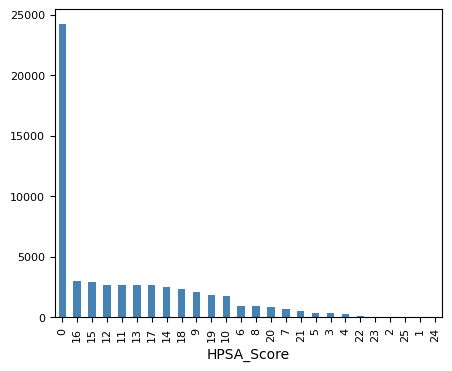

In [88]:
hpsa_data['HPSA_Score'].value_counts()
# bar graph of HPSA_Score
hpsa_data['HPSA_Score'].value_counts().plot(kind='bar', figsize=(5,4), fontsize=8, color='steelblue')

In [89]:
hpsa_data.dtypes.value_counts()


bool       40
float64     9
int64       3
int8        3
Name: count, dtype: int64

In [90]:
# the non bool columns are
float_columns = hpsa_data.select_dtypes(include=['float64']).columns
int_columns = hpsa_data.select_dtypes(include=['int64', 'int8']).columns

# Print out the names of the columns
print("Float columns:", float_columns)
print("Integer columns:", int_columns)

Float columns: Index(['Designation_Pop', 'Estimated_Underserved_Pop', 'Total_FTE_Clinicians',
       'Percent_Pop_Below_Poverty', 'HPSA_Shortage',
       'Interaction_Designation_Poverty', 'Interaction_Designation_Shortage',
       'Interaction_Poverty_HPSA_Shortage', 'Interaction_All_Three'],
      dtype='object')
Integer columns: Index(['HPSA_Score', 'Rural_Status_Endcoded', 'Region_Encoded',
       'US_Mexico_Border_County_Encoded', 'US_Mexico_Border_100km_Encoded',
       'Metropolitan_Indicator_Code_Encoded'],
      dtype='object')


# RF Regressor , best model * 

In [91]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import pandas as pd
from math import sqrt
n_jobs = -1
# Assuming `hpsa_data` is your preprocessed dataset
X = hpsa_data.drop('HPSA_Score', axis=1)
y = hpsa_data['HPSA_Score']

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardization
scaler = StandardScaler()
XX_Train = scaler.fit_transform(X_train)
XX_Test = scaler.transform(X_test)

# Setting up the Random Forest Regressor
rf = RandomForestRegressor(random_state=42)

#Hyperparameter grid
param_grid = {
    'n_estimators': [100, 250, 400],
    'max_depth': [None, 10, 25, 50, 80],
    'min_samples_split': [2, 5, 10, 20]
}


# Grid Search with Cross-Validation
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(XX_Train, y_train)

# Best parameters
best_params = grid_search.best_params_
print(f"Best parameters: {best_params}")

# Re-fitting the model with the best parameters
best_rf = grid_search.best_estimator_

# Final evaluation on the test set
y_pred = best_rf.predict(XX_Test)
print(f"Test Set RMSE: {sqrt(mean_squared_error(y_test, y_pred))}")
print(f"Test Set R-squared: {r2_score(y_test, y_pred)}")

# Feature importance
feature_importances = pd.Series(best_rf.feature_importances_, index=X.columns)



Fitting 5 folds for each of 60 candidates, totalling 300 fits
[CV] END max_depth=None, min_samples_split=2, n_estimators=100; total time=  13.8s
[CV] END max_depth=None, min_samples_split=2, n_estimators=100; total time=  13.9s
[CV] END max_depth=None, min_samples_split=2, n_estimators=100; total time=  13.9s
[CV] END max_depth=None, min_samples_split=2, n_estimators=100; total time=  13.9s
[CV] END max_depth=None, min_samples_split=2, n_estimators=100; total time=  14.0s
[CV] END max_depth=None, min_samples_split=2, n_estimators=250; total time=  31.5s
[CV] END max_depth=None, min_samples_split=2, n_estimators=250; total time=  33.5s
[CV] END max_depth=None, min_samples_split=2, n_estimators=250; total time=  34.3s
[CV] END max_depth=None, min_samples_split=2, n_estimators=250; total time=  38.8s
[CV] END max_depth=None, min_samples_split=2, n_estimators=250; total time=  38.8s
[CV] END max_depth=None, min_samples_split=5, n_estimators=100; total time=  12.2s
[CV] END max_depth=None, 

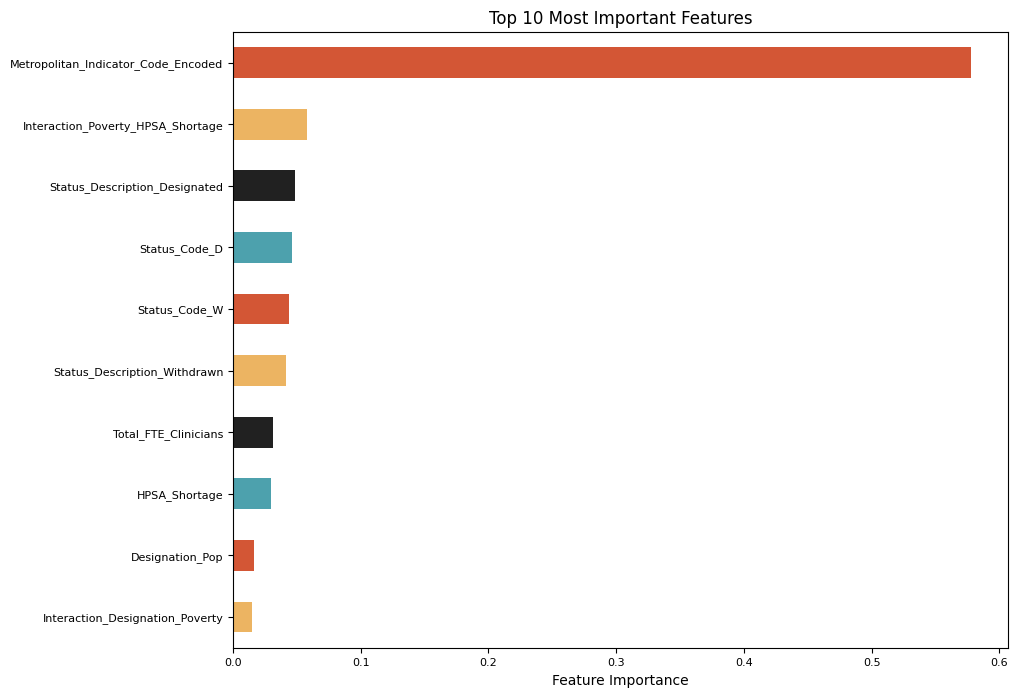

In [92]:
import matplotlib.pyplot as plt
import itertools

# Define your color palette
palette = ['#ECB462', '#D35635', '#4DA1AD', '#212121']

# Create a cycle of your palette to cover all bars
color_cycle = itertools.cycle(palette)

# Sort the feature importances in descending order
sorted_feature_importances = feature_importances.nlargest(10).sort_values()

# Plot using the colors from the palette
sorted_feature_importances.plot(kind='barh', figsize=(10, 8), fontsize=8, color=[next(color_cycle) for _ in range(len(sorted_feature_importances))])

plt.xlabel('Feature Importance')
plt.title('Top 10 Most Important Features')
plt.show()


Lasso +  Lin reg below 
Seems to be worse than RF. Also LASSO LR and regular LR yield the same exact MSE 

In [93]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Assuming `hpsa_data` is your preprocessed dataset
X = hpsa_data.drop('HPSA_Score', axis=1)
y = hpsa_data['HPSA_Score']

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardization
scaler = StandardScaler()
XX_Train = scaler.fit_transform(X_train)
XX_Test = scaler.transform(X_test)

# Setting up the Lasso Regression model
lasso = Lasso(random_state=42)

# Hyperparameter grid
param_grid = {
    'alpha': [0.001, 0.01, 0.1, 1, 10, 100]
}

# Grid Search with Cross-Validation
grid_search = GridSearchCV(estimator=lasso, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(XX_Train, y_train)

# Best parameters
best_params = grid_search.best_params_
print(f"Best parameters: {best_params}")

# Re-fitting the model with the best parameters
best_lasso = grid_search.best_estimator_

# Predicting on test set
y_pred = best_lasso.predict(XX_Test)

# Evaluating the model
print(f"Test Set RMSE: {sqrt(mean_squared_error(y_test, y_pred))}")
print(f"Test Set R-squared: {r2_score(y_test, y_pred)}")

# Coefficients
coefficients = pd.Series(best_lasso.coef_, index=X.columns)


Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV] END .........................................alpha=0.01; total time=   2.0s
[CV] END .........................................alpha=0.01; total time=   2.0s
[CV] END .........................................alpha=0.01; total time=   2.1s
[CV] END .........................................alpha=0.01; total time=   2.1s
[CV] END .........................................alpha=0.01; total time=   2.2s
[CV] END ........................................alpha=0.001; total time=   2.3s
[CV] END ........................................alpha=0.001; total time=   2.3s
[CV] END ........................................alpha=0.001; total time=   2.4s
[CV] END ........................................alpha=0.001; total time=   2.4s


/Users/raffimannarelli/.pyenv/versions/3.11.0/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.679e+03, tolerance: 1.980e+02
  model = cd_fast.enet_coordinate_descent(
/Users/raffimannarelli/.pyenv/versions/3.11.0/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.668e+03, tolerance: 1.981e+02
  model = cd_fast.enet_coordinate_descent(
/Users/raffimannarelli/.pyenv/versions/3.11.0/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check t

[CV] END ........................................alpha=0.001; total time=   2.4s
[CV] END ..........................................alpha=0.1; total time=   0.6s


/Users/raffimannarelli/.pyenv/versions/3.11.0/lib/python3.11/site-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


[CV] END ..........................................alpha=0.1; total time=   0.6s
[CV] END ..........................................alpha=0.1; total time=   0.5s
[CV] END ............................................alpha=1; total time=   0.4s
[CV] END ..........................................alpha=0.1; total time=   0.5s
[CV] END ..........................................alpha=0.1; total time=   0.5s
[CV] END ............................................alpha=1; total time=   0.4s
[CV] END ...........................................alpha=10; total time=   0.0s
[CV] END ...........................................alpha=10; total time=   0.0s
[CV] END ...........................................alpha=10; total time=   0.0s
[CV] END ...........................................alpha=10; total time=   0.0s
[CV] END ...........................................alpha=10; total time=   0.0s
[CV] END ..........................................alpha=100; total time=   0.0s
[CV] END ...................

/Users/raffimannarelli/.pyenv/versions/3.11.0/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.429e+03, tolerance: 2.470e+02
  model = cd_fast.enet_coordinate_descent(


# XGBOOST - RSME : 1.65

In [94]:
import xgboost as xgb
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from math import sqrt
import pandas as pd

# Assuming `hpsa_data` is your preprocessed dataset
X = hpsa_data.drop('HPSA_Score', axis=1)
y = hpsa_data['HPSA_Score']
feature_names = X.columns
feature_names_list = feature_names.tolist()

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardization
scaler = StandardScaler()
XX_Train = scaler.fit_transform(X_train)
XX_Test = scaler.transform(X_test)

dtrain = xgb.DMatrix(XX_Train, label=y_train, feature_names=feature_names_list)
dtest = xgb.DMatrix(XX_Test, label=y_test, feature_names=feature_names_list)

# Setting up the XGBoost Regressor
xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', seed=42)

# Hyperparameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'colsample_bytree': [0.3, 0.7]
}

# Grid Search with Cross-Validation
grid_search = GridSearchCV(estimator=xg_reg, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(XX_Train, y_train)

# Best parameters
best_params = grid_search.best_params_
print(f"Best parameters: {best_params}")

# Re-fitting the model with the best parameters
best_xg_reg = grid_search.best_estimator_

# Predicting on test set
y_pred = best_xg_reg.predict(XX_Test)

# Evaluating the model
print(f"Test Set RMSE: {sqrt(mean_squared_error(y_test, y_pred))}")
print(f"Test Set R-squared: {r2_score(y_test, y_pred)}")

# Feature importance




Fitting 5 folds for each of 54 candidates, totalling 270 fits
[CV] END colsample_bytree=0.3, learning_rate=0.01, max_depth=3, n_estimators=100; total time=   0.3s
[CV] END colsample_bytree=0.3, learning_rate=0.01, max_depth=3, n_estimators=100; total time=   0.3s
[CV] END colsample_bytree=0.3, learning_rate=0.01, max_depth=3, n_estimators=100; total time=   0.3s
[CV] END colsample_bytree=0.3, learning_rate=0.01, max_depth=3, n_estimators=100; total time=   0.4s
[CV] END colsample_bytree=0.3, learning_rate=0.01, max_depth=3, n_estimators=200; total time=   0.6s
[CV] END colsample_bytree=0.3, learning_rate=0.01, max_depth=3, n_estimators=200; total time=   0.6s
[CV] END colsample_bytree=0.3, learning_rate=0.01, max_depth=3, n_estimators=200; total time=   0.6s
[CV] END colsample_bytree=0.3, learning_rate=0.01, max_depth=3, n_estimators=200; total time=   0.7s
[CV] END colsample_bytree=0.3, learning_rate=0.01, max_depth=3, n_estimators=100; total time=   0.3s
[CV] END colsample_bytree=0.3

/Users/raffimannarelli/.pyenv/versions/3.11.0/lib/python3.11/site-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


[CV] END colsample_bytree=0.3, learning_rate=0.01, max_depth=5, n_estimators=300; total time=   1.5s
[CV] END colsample_bytree=0.3, learning_rate=0.01, max_depth=7, n_estimators=100; total time=   0.6s
[CV] END colsample_bytree=0.3, learning_rate=0.01, max_depth=7, n_estimators=100; total time=   0.6s
[CV] END colsample_bytree=0.3, learning_rate=0.01, max_depth=7, n_estimators=100; total time=   0.7s
[CV] END colsample_bytree=0.3, learning_rate=0.01, max_depth=5, n_estimators=300; total time=   1.2s
[CV] END colsample_bytree=0.3, learning_rate=0.01, max_depth=7, n_estimators=200; total time=   1.2s
[CV] END colsample_bytree=0.3, learning_rate=0.01, max_depth=7, n_estimators=200; total time=   1.1s
[CV] END colsample_bytree=0.3, learning_rate=0.01, max_depth=7, n_estimators=200; total time=   1.0s
[CV] END colsample_bytree=0.3, learning_rate=0.01, max_depth=7, n_estimators=200; total time=   1.1s
[CV] END colsample_bytree=0.3, learning_rate=0.01, max_depth=7, n_estimators=200; total tim

# Neural Net w/ dropout

In [95]:
import tensorflow as tf

# Set TensorFlow configuration for better resource utilization
# These lines must be at the very beginning before other TensorFlow imports
tf.config.threading.set_intra_op_parallelism_threads(8)  # Adjust based on your CPU
tf.config.threading.set_inter_op_parallelism_threads(4)  # Adjust based on your CPU
tf.config.optimizer.set_jit(True)  # Enable XLA compilation

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers.legacy import Adam
from tensorflow.keras.activations import gelu
from sklearn.metrics import mean_squared_error
from tensorflow.keras.callbacks import LearningRateScheduler


# Custom RMSE Loss Function
def rmse(y_true, y_pred):
    y_true = tf.cast(y_true, tf.float32)
    y_pred = tf.cast(y_pred, tf.float32)
    return tf.sqrt(tf.reduce_mean(tf.square(y_pred - y_true)))

# Learning Rate Scheduler Function
def lr_time_based_decay(epoch, lr):
    return lr * 1 / (1 + 0.01 * epoch)

# Assuming `hpsa_data` is your preprocessed dataset
X = hpsa_data.drop('HPSA_Score', axis=1)
y = hpsa_data['HPSA_Score'].astype(np.float32)  # Ensure y is float32

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardization
scaler = StandardScaler()
XX_Train = scaler.fit_transform(X_train)
XX_Test = scaler.transform(X_test)

# Neural Network Model Setup
model = Sequential()

# Funnel-type architecture with L2 Regularization and Batch Normalization
model.add(Dense(1028, input_dim=XX_Train.shape[1], activation=gelu, kernel_regularizer=l2(0.001)))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(Dense(512, activation=gelu, kernel_regularizer=l2(0.001)))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(256, activation=gelu, kernel_regularizer=l2(0.001)))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(128, activation=gelu, kernel_regularizer=l2(0.001)))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(64, activation=gelu, kernel_regularizer=l2(0.001)))
model.add(BatchNormalization())
model.add(Dropout(0.1))
model.add(Dense(1, activation='linear'))  # Output layer for regression

# Compile the Model
model.compile(optimizer=Adam(learning_rate=0.001), loss=rmse)

# Fit the Model with Learning Rate Scheduler
model.fit(XX_Train, y_train, epochs=100, batch_size=20, verbose=1, callbacks=[LearningRateScheduler(lr_time_based_decay)])

# Predicting on Test Set
y_pred = model.predict(XX_Test)

# Evaluating the Model using RMSE
rmse_value = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Test Set RMSE: {rmse_value}")


Epoch 1/100
2269/2269 [==============================] - 15s 6ms/step - loss: 4.8537 - lr: 0.0010
Epoch 2/100
2269/2269 [==============================] - 14s 6ms/step - loss: 3.8275 - lr: 9.9010e-04
Epoch 3/100
2269/2269 [==============================] - 14s 6ms/step - loss: 3.6931 - lr: 9.7069e-04
Epoch 4/100
2269/2269 [==============================] - 14s 6ms/step - loss: 3.6476 - lr: 9.4241e-04
Epoch 5/100
2269/2269 [==============================] - 38s 17ms/step - loss: 3.5899 - lr: 9.0617e-04
Epoch 6/100
2269/2269 [==============================] - 10s 4ms/step - loss: 3.5190 - lr: 8.6302e-04
Epoch 7/100
2269/2269 [==============================] - 10s 5ms/step - loss: 3.4785 - lr: 8.1417e-04
Epoch 8/100
2269/2269 [==============================] - 10s 5ms/step - loss: 3.4237 - lr: 7.6090e-04
Epoch 9/100
2269/2269 [==============================] - 11s 5ms/step - loss: 3.3627 - lr: 7.0454e-04
Epoch 10/100
2269/2269 [==============================] - 213s 94ms/step - loss: 3.34

## Using Random Forest for Classifcation purposes. Did this to see if we treated the HPSA_Score as 1-25 categories if we would see differing results. 

In [96]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import pandas as pd

# Assuming `hpsa_data` is your preprocessed dataset
# Replace `target_column` with the name of your target variable
X = hpsa_data.drop('HPSA_Score', axis=1)
y = hpsa_data['HPSA_Score']

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardization
# note that the boolean columns are not standardized by the STD Scaler class, they are excluded
scaler = StandardScaler()
XX_Train = scaler.fit_transform(X_train)
XX_Test = scaler.transform(X_test)

# Setting up the Random Forest Classifier
rf = RandomForestClassifier(random_state=42)

# Hyperparameter grid
param_grid = {
    'n_estimators': [100, 250, 400],
    'max_depth': [None, 10, 25, 50,80], # None means no limit on depth
    'min_samples_split': [2, 5, 10,20]
}

# Grid Search with Cross-Validation
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(XX_Train, y_train)

# Best parameters
best_params = grid_search.best_params_
print(f"Best parameters: {best_params}")

# Re-fitting the model with the best parameters
best_rf = grid_search.best_estimator_

# Cross-validated performance
cv_scores = cross_val_score(best_rf, XX_Train, y_train, cv=5)
print(f"Mean CV Accuracy: {cv_scores.mean()}")

# Final evaluation on the test set
y_pred = best_rf.predict(XX_Test)
print(f"Test Set Accuracy: {accuracy_score(y_test, y_pred)}")
print(classification_report(y_test, y_pred))

# Feature importance
feature_importances_RFCat = pd.Series(best_rf.feature_importances_, index=X.columns)


Fitting 5 folds for each of 60 candidates, totalling 300 fits
[CV] END max_depth=None, min_samples_split=2, n_estimators=100; total time=   4.6s
[CV] END max_depth=None, min_samples_split=2, n_estimators=100; total time=   4.7s
[CV] END max_depth=None, min_samples_split=2, n_estimators=100; total time=   4.7s
[CV] END max_depth=None, min_samples_split=2, n_estimators=100; total time=   4.8s
[CV] END max_depth=None, min_samples_split=2, n_estimators=100; total time=   4.8s
[CV] END max_depth=None, min_samples_split=2, n_estimators=250; total time=  11.8s
[CV] END max_depth=None, min_samples_split=2, n_estimators=250; total time=  11.8s
[CV] END max_depth=None, min_samples_split=2, n_estimators=250; total time=  11.9s
[CV] END max_depth=None, min_samples_split=2, n_estimators=250; total time=  11.9s
[CV] END max_depth=None, min_samples_split=2, n_estimators=250; total time=  12.0s
[CV] END max_depth=None, min_samples_split=5, n_estimators=100; total time=   4.8s
[CV] END max_depth=None, 

/Users/raffimannarelli/.pyenv/versions/3.11.0/lib/python3.11/site-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


[CV] END max_depth=None, min_samples_split=5, n_estimators=250; total time=  11.6s
[CV] END max_depth=None, min_samples_split=5, n_estimators=250; total time=  11.7s
[CV] END max_depth=None, min_samples_split=5, n_estimators=250; total time=  11.7s
[CV] END max_depth=None, min_samples_split=5, n_estimators=250; total time=  11.8s
[CV] END max_depth=None, min_samples_split=5, n_estimators=250; total time=  11.7s
[CV] END max_depth=None, min_samples_split=10, n_estimators=100; total time=   4.8s
[CV] END max_depth=None, min_samples_split=10, n_estimators=100; total time=   4.8s
[CV] END max_depth=None, min_samples_split=10, n_estimators=100; total time=   4.8s
[CV] END max_depth=None, min_samples_split=10, n_estimators=100; total time=   4.8s
[CV] END max_depth=None, min_samples_split=10, n_estimators=100; total time=   4.8s
[CV] END max_depth=None, min_samples_split=5, n_estimators=400; total time=  19.3s
[CV] END max_depth=None, min_samples_split=5, n_estimators=400; total time=  19.3s